In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Code

In [1]:
# to check if the kaggle has access to internet

import os

# List all files in the dataset directory
dataset_path = '/kaggle/input/bttai-ajl-2025'
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        pass
        # print(os.path.join(dirname, filename))  # Print each file's full path
print("complete")

complete


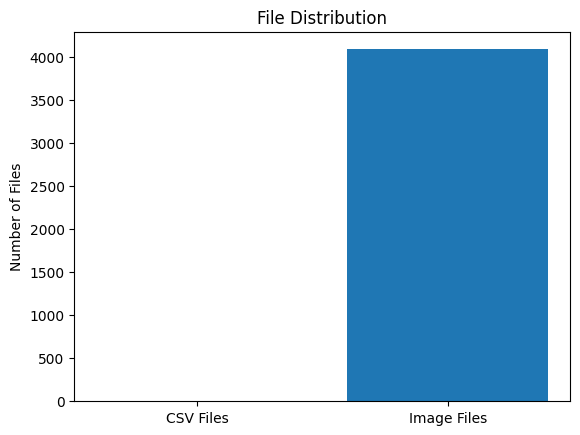

In [2]:
import os
import matplotlib.pyplot as plt

dataset_path = '/kaggle/input/bttai-ajl-2025'

# Initializin gthe counters for the files
csv_files = []
image_files = []

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith('.csv'):
            csv_files.append(os.path.join(dirname, filename))
        elif filename.endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(dirname, filename))

# this will plot file distributions
file_types = ['CSV Files', 'Image Files']
counts = [len(csv_files), len(image_files)]

plt.bar(file_types, counts)
plt.title("File Distribution")
plt.ylabel("Number of Files")
plt.show()

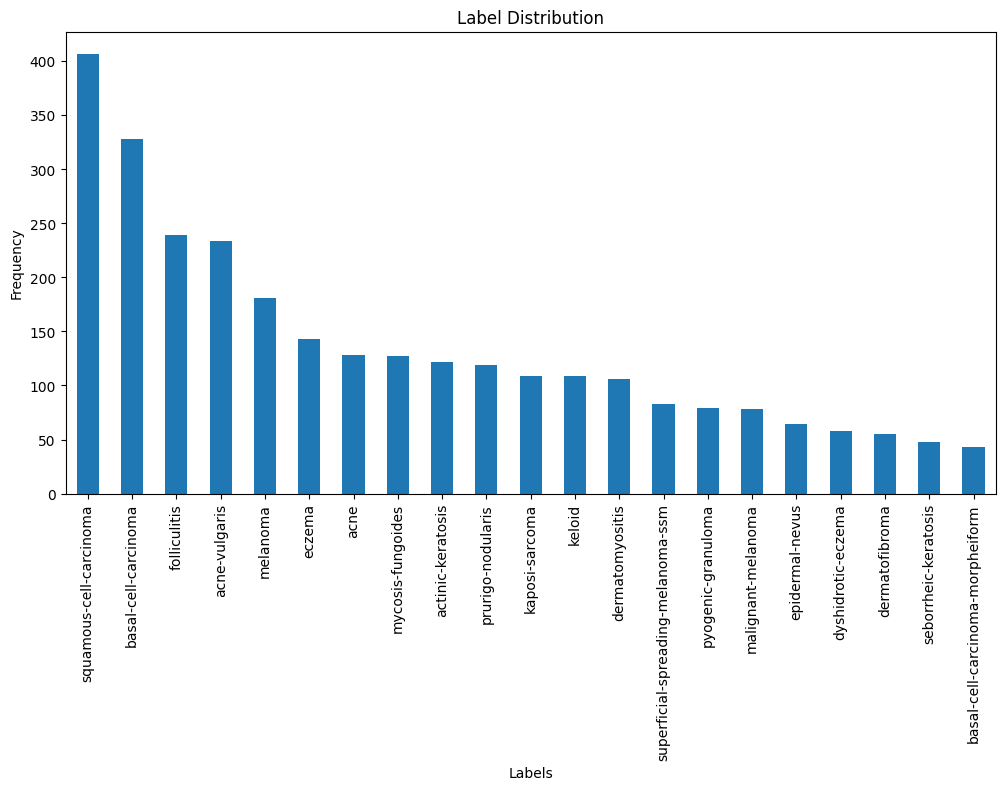

In [3]:
import pandas as pd

train_csv_path = '/kaggle/input/bttai-ajl-2025/train.csv'

# Load training data
train_data = pd.read_csv(train_csv_path)

# Visualize label distribution
plt.figure(figsize=(12, 6))
train_data['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()

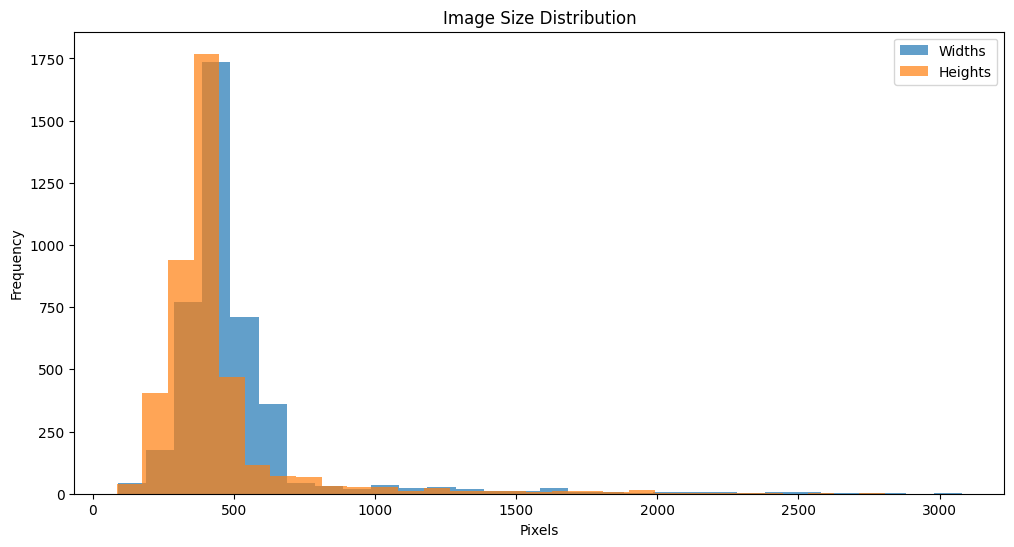

In [4]:
from PIL import Image
import numpy as np

image_sizes = []

for image_path in image_files:
    with Image.open(image_path) as img:
        image_sizes.append(img.size)

# Extract width and height
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

# Plot distributions
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=30, alpha=0.7, label='Widths')
plt.hist(heights, bins=30, alpha=0.7, label='Heights')
plt.title("Image Size Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.show()

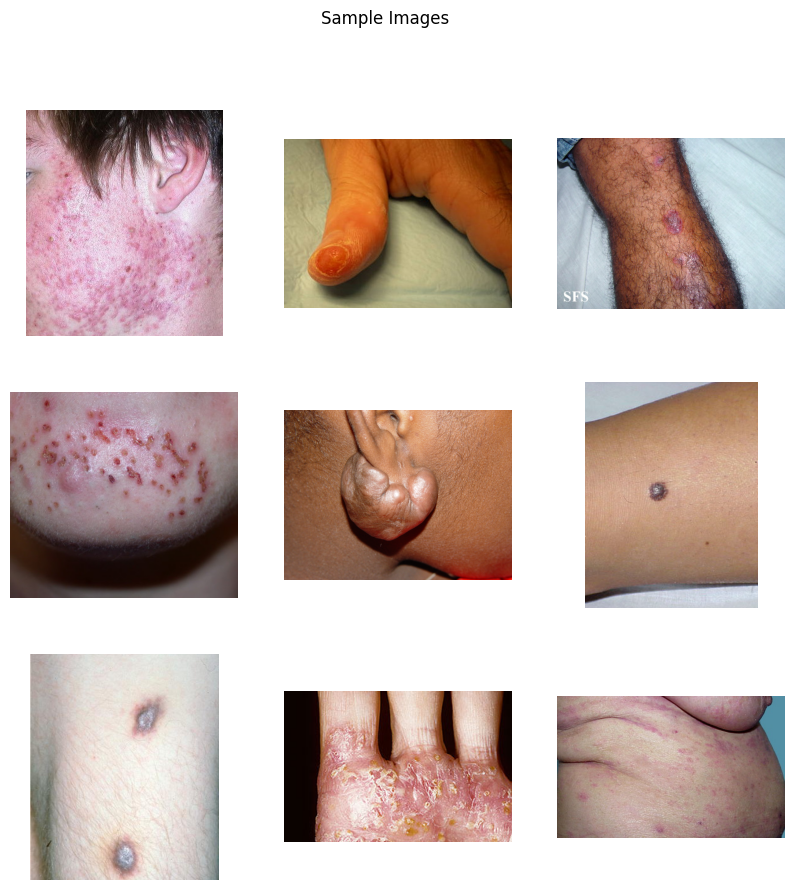

In [5]:
import random
import matplotlib.pyplot as plt

# Select random images
random_images = random.sample(image_files, 9)

# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i, img_path in enumerate(random_images):
    with Image.open(img_path) as img:
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
plt.suptitle("Sample Images")
plt.show()

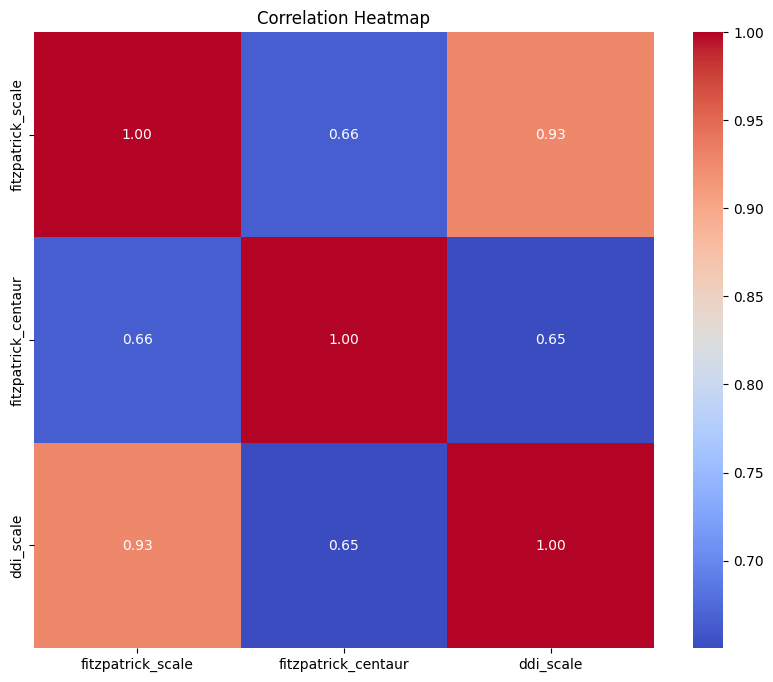

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


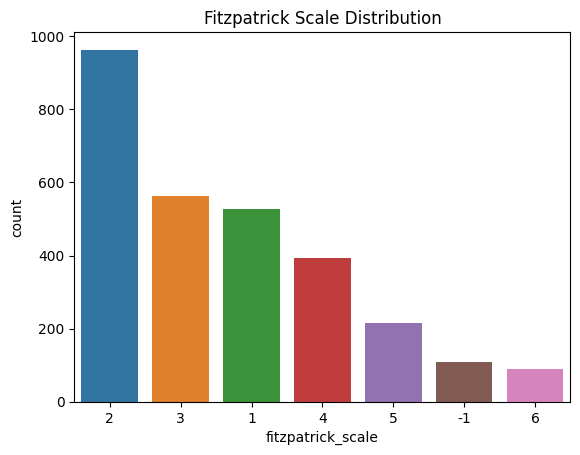

In [8]:
# Analyze Dataset Diversity
sns.countplot(data=train_data, x='fitzpatrick_scale', order=train_data['fitzpatrick_scale'].value_counts().index)
plt.title("Fitzpatrick Scale Distribution")
plt.show()

In [9]:
# Check Label Correlations
# Assuming 'labels' column has multi-label data separated by commas
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
binary_labels = mlb.fit_transform(train_data['labels'].str.split(','))
label_corr = pd.DataFrame(binary_labels, columns=mlb.classes_).corr()
sns.heatmap(label_corr, annot=True, cmap='coolwarm')
plt.title("Label Co-occurrence Heatmap")
plt.show()

KeyError: 'labels'

In [10]:
# Explore Metadata Impact
sns.boxplot(data=train_data, x='label', y='age')
plt.xticks(rotation=90)
plt.title("Age Distribution by Condition")
plt.show()

ValueError: Could not interpret input 'age'

In [11]:
import cv2
brightness = []
for img_path in image_paths:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    brightness.append(img.mean())
sns.histplot(brightness, kde=True)
plt.title("Brightness Distribution")
plt.show()

NameError: name 'image_paths' is not defined

In [12]:
misclassified = test_data[test_data['true_label'] != test_data['predicted_label']]
visualize_images(misclassified['image_path'].head(10))  # Function to visualize

NameError: name 'test_data' is not defined

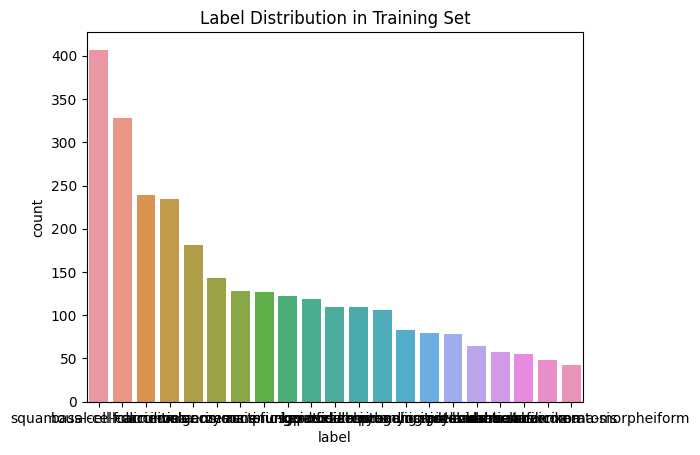

In [13]:
sns.countplot(data=train_data, x='label', order=train_data['label'].value_counts().index)
plt.title("Label Distribution in Training Set")
plt.show()

In [14]:
sns.histplot(feature_values)
plt.title("Engineered Feature Distribution")
plt.show()

NameError: name 'feature_values' is not defined